In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("Titanic-Dataset.csv")

In [ ]:
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()


In [7]:
categorical_cols = df.select_dtypes(exclude=[np.number]).columns.tolist()


In [8]:
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        median_value = df[col].median()
        df[col].fillna(median_value, inplace=True)
        print(f"Filled missing values in {col} with median: {median_value}")

Filled missing values in Age with median: 28.0


In [9]:
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)
        print(f"Filled missing values in {col} with mode: {mode_value}")

Filled missing values in Cabin with mode: B96 B98
Filled missing values in Embarked with mode: S


In [10]:
print("\nMissing Values After Imputation:")
print(df.isnull().sum())


Missing Values After Imputation:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [11]:
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
print("\nEncoded Dataset Columns:")
print(df_encoded.columns)


Encoded Dataset Columns:
Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Name_Abbott, Mr. Rossmore Edward',
       'Name_Abbott, Mrs. Stanton (Rosa Hunt)', 'Name_Abelson, Mr. Samuel',
       ...
       'Cabin_F G63', 'Cabin_F G73', 'Cabin_F2', 'Cabin_F33', 'Cabin_F38',
       'Cabin_F4', 'Cabin_G6', 'Cabin_T', 'Embarked_Q', 'Embarked_S'],
      dtype='object', length=1726)


In [12]:
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])
print("\nFirst few rows of standardized numerical features:")
print(df_encoded[numeric_cols].head())


First few rows of standardized numerical features:
   PassengerId  Survived    Pclass       Age     SibSp     Parch      Fare
0    -1.730108 -0.789272  0.827377 -0.565736  0.432793 -0.473674 -0.502445
1    -1.726220  1.266990 -1.566107  0.663861  0.432793 -0.473674  0.786845
2    -1.722332  1.266990  0.827377 -0.258337 -0.474545 -0.473674 -0.488854
3    -1.718444  1.266990 -1.566107  0.433312  0.432793 -0.473674  0.420730
4    -1.714556 -0.789272  0.827377  0.433312 -0.474545 -0.473674 -0.486337


In [ ]:
def remove_outliers_iqr(data, column):

   # Removes outliers from a given column based on the IQR method.
    
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filtering data
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

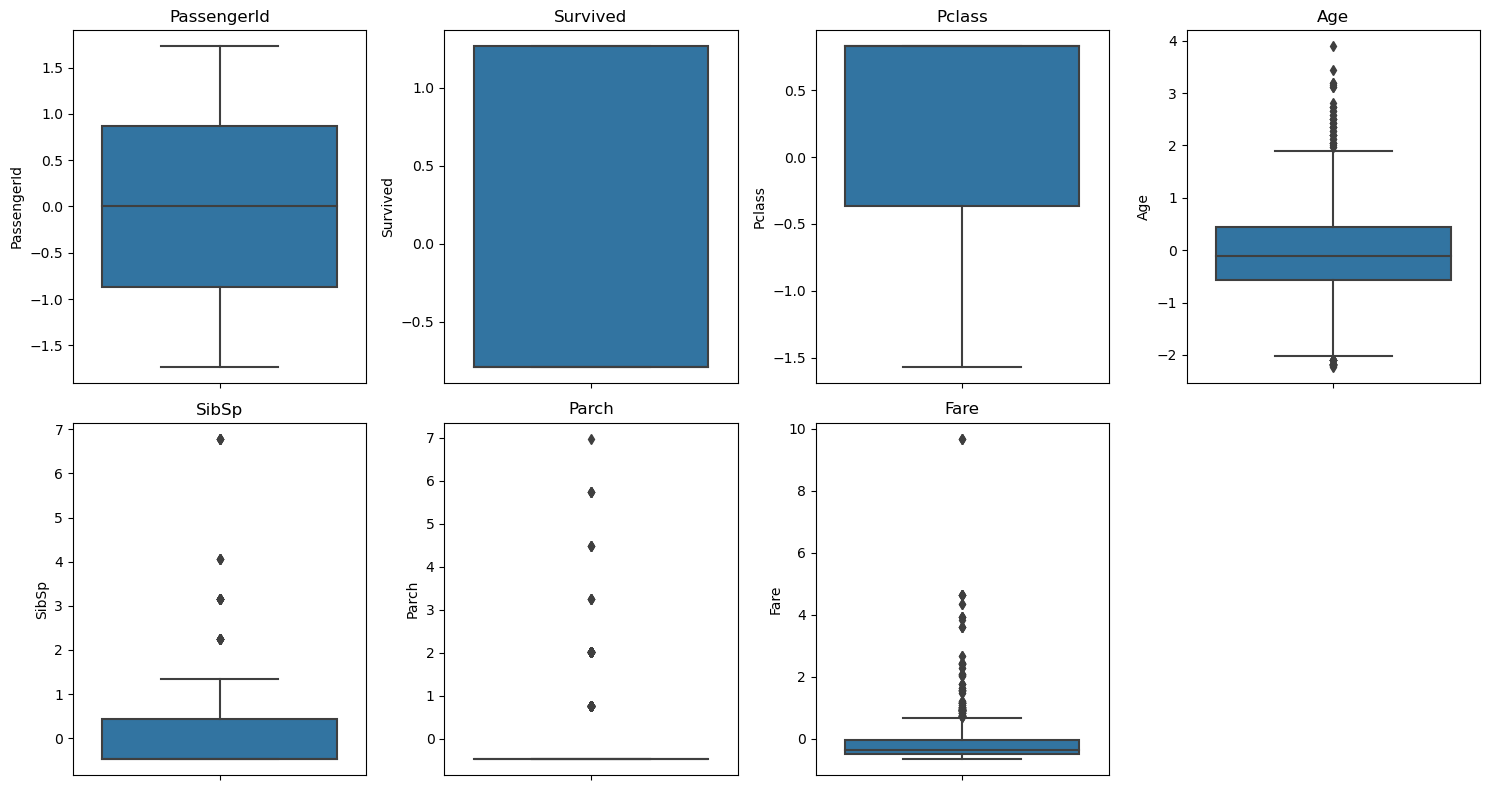

In [14]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, len(numeric_cols)//2 + 1, i)
    sns.boxplot(y=df_encoded[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [16]:
df_clean = df_encoded.copy()
for col in numeric_cols:
    original_shape = df_clean.shape
    df_clean = remove_outliers_iqr(df_clean, col)
    print(f"Column '{col}': removed {original_shape[0] - df_clean.shape[0]} outliers.")

print("\nShape of dataset after outlier removal:", df_clean.shape)

Column 'PassengerId': removed 0 outliers.
Column 'Survived': removed 0 outliers.
Column 'Pclass': removed 0 outliers.
Column 'Age': removed 66 outliers.
Column 'SibSp': removed 39 outliers.
Column 'Parch': removed 144 outliers.
Column 'Fare': removed 81 outliers.

Shape of dataset after outlier removal: (561, 1726)


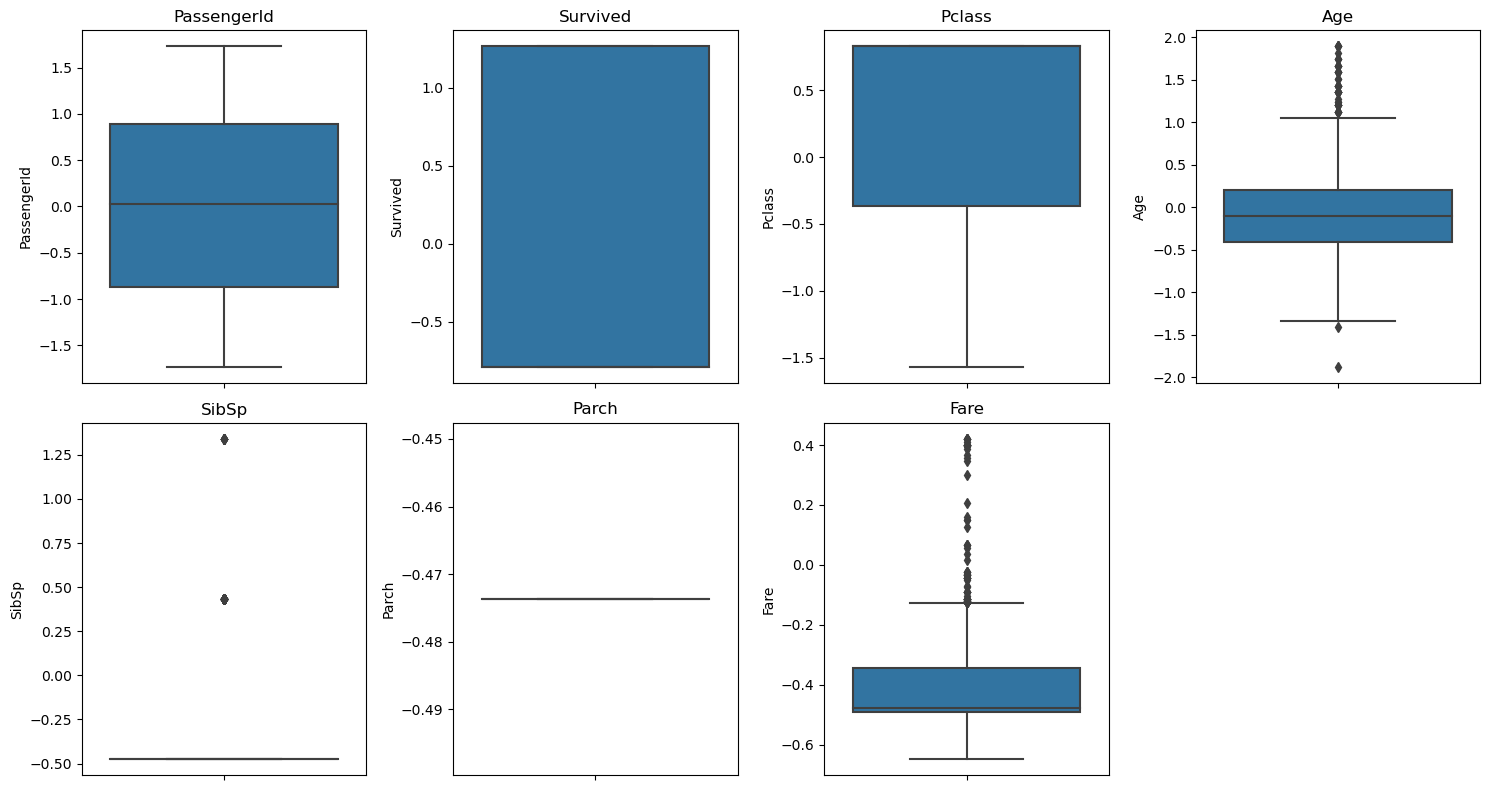

In [17]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, len(numeric_cols)//2 + 1, i)
    sns.boxplot(y=df_clean[col])
    plt.title(col)
plt.tight_layout()
plt.show()